In [1]:
import numpy as np
import numpy.linalg as npl
import pandas as pd
from math import *
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns

# Import et mise en forme du Dataset :

In [3]:
data_all = pd.read_csv('titanicTrain.csv')
data=data_all.drop(["PassengerId","Name","Ticket","Cabin", "Embarked"], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [3]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [4]:
data["Survived"]=pd.Categorical(data["Survived"], ordered=False)
data["Survived"] = data["Survived"].cat.rename_categories(["Dead","Alive"])
data["Pclass"]=pd.Categorical(data["Pclass"],ordered=False)
data["Sex"]=pd.Categorical(data["Sex"],ordered=False)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,Dead,3,male,22.0,1,0,7.2500
1,Alive,1,female,38.0,1,0,71.2833
2,Alive,3,female,26.0,0,0,7.9250
3,Alive,1,female,35.0,1,0,53.1000
4,Dead,3,male,35.0,0,0,8.0500


In [5]:
data.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
dtype: object

# Partie 1 : Analyse Descriptive

##  I - Unidimensionnelle :

In [6]:
data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891,891.0,891,714.000000,891.000000,891.000000,891.000000
unique,2,3.0,2,NaN,NaN,NaN,NaN
top,Dead,3.0,male,NaN,NaN,NaN,NaN
freq,549,491.0,577,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,29.699118,0.523008,0.381594,32.204208
std,NaN,NaN,NaN,14.526497,1.102743,0.806057,49.693429
min,NaN,NaN,NaN,0.420000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,20.125000,0.000000,0.000000,7.910400
50%,NaN,NaN,NaN,28.000000,0.000000,0.000000,14.454200
75%,NaN,NaN,NaN,38.000000,1.000000,0.000000,31.000000


###  1) Variables qualitatives : 

In [7]:
print("Survivants : ")
table_surv = data["Survived"].value_counts()
print(table_surv)
print("")
print("Passenger Class : ")
table_Pclass= data["Pclass"].value_counts(sort=False)
print(table_Pclass)
print("")
print("Sex ")
table_sex = data["Sex"].value_counts()
print(table_sex)

Survivants : 
Dead     549
Alive    342
Name: Survived, dtype: int64

Passenger Class : 
1    216
2    184
3    491
Name: Pclass, dtype: int64

Sex 
male      577
female    314
Name: Sex, dtype: int64


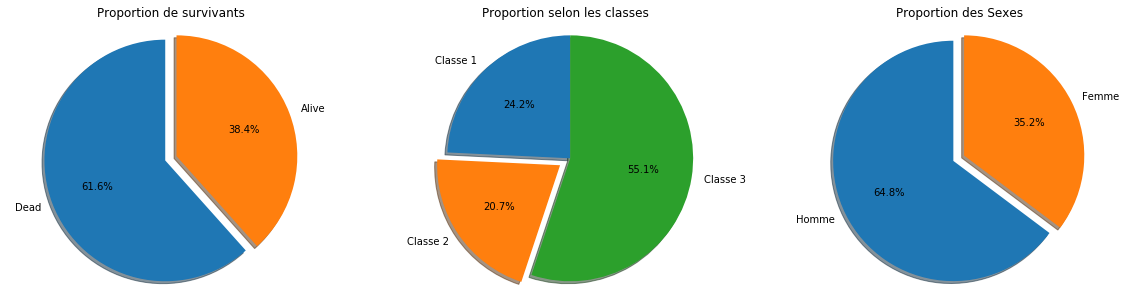

In [8]:
fig,ax = plt.subplots(1,3, figsize=(20,5))
ax[0].pie(table_surv,explode=(0,0.1), labels=["Dead", "Alive"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title("Proportion de survivants")

ax[1].pie(table_Pclass,explode=(0,0.1,0), labels=["Classe 1", "Classe 2", "Classe 3"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title("Proportion selon les classes")

ax[2].pie(table_sex,explode=(0,0.1), labels=["Homme","Femme"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2].axis('equal')
ax[2].set_title("Proportion des Sexes")

plt.show()

### Variables quantitatives : 

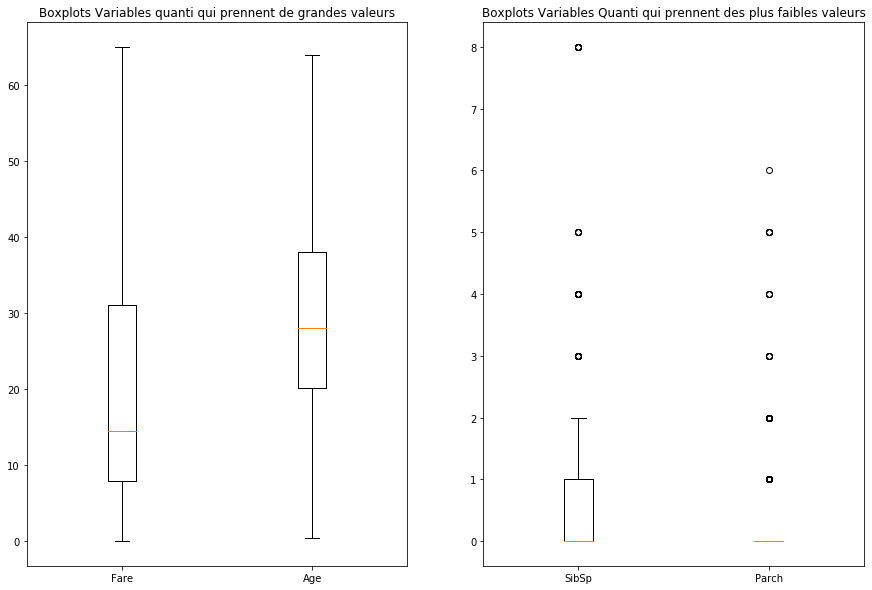

In [9]:
fig2, ax2 = plt.subplots(1,2, figsize=(15,10))
ax2[0].set_title('Boxplots Variables quanti qui prennent de grandes valeurs')
ax2[0].boxplot([data["Fare"],data[data["Age"].notna()]["Age"]], labels= ["Fare","Age"],showfliers=False)

ax2[1].set_title('Boxplots Variables Quanti qui prennent des plus faibles valeurs')
ax2[1].boxplot([data["SibSp"],data["Parch"]], labels=["SibSp","Parch"])
plt.show()

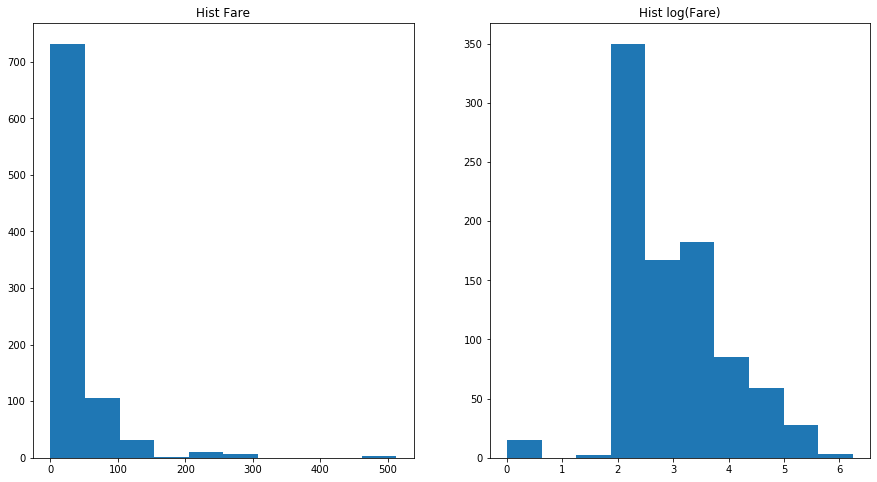

In [10]:
fig3,(ax31,ax32) = plt.subplots(1,2, figsize=(15,8))

ax31.hist(data["Fare"])
ax31.set_title('Hist Fare')

ax32.hist(np.log(1+data["Fare"]))
ax32.set_title("Hist log(Fare)")

plt.show()

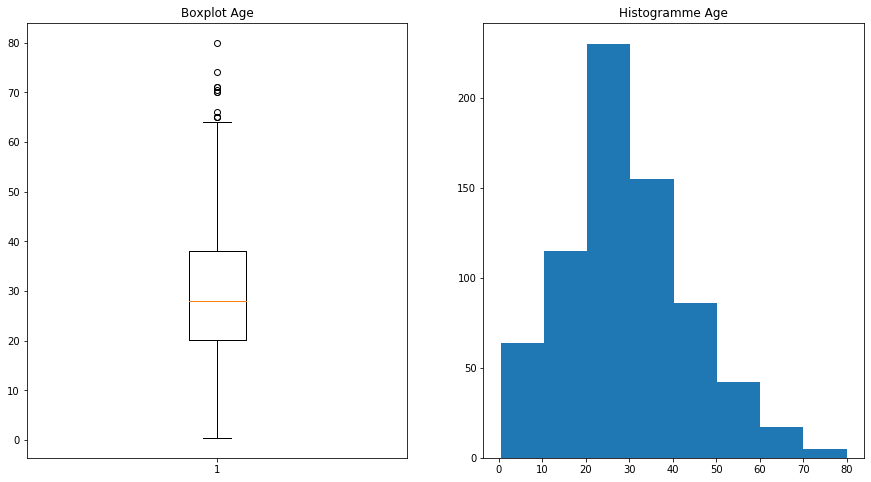

In [11]:
fig4,(ax41,ax42) = plt.subplots(1,2, figsize=(15,8))

ax42.hist(data[data["Age"].notna()]["Age"], bins=8)
ax42.set_title('Histogramme Age')

ax41.boxplot(data[data["Age"].notna()]["Age"])
ax41.set_title("Boxplot Age")

plt.show()

## Analyse Multidimensionnelle :  

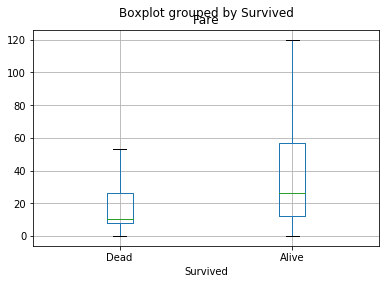

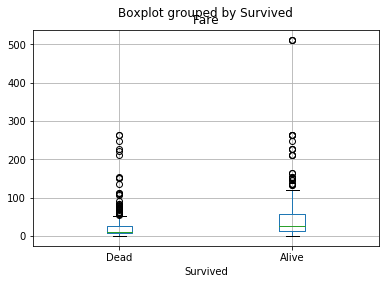

In [12]:
data.boxplot('Fare','Survived', showfliers=False)
data.boxplot('Fare','Survived') #showfliers=False)
plt.show()

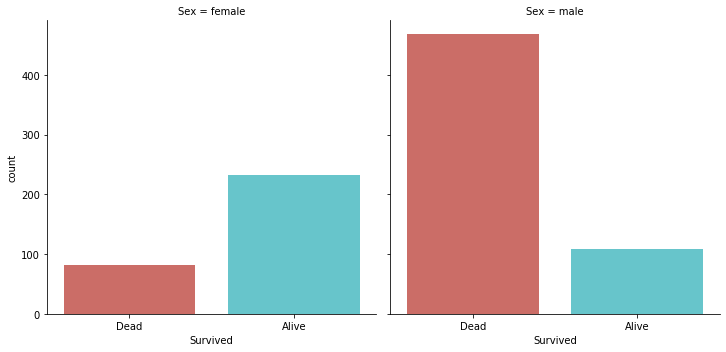

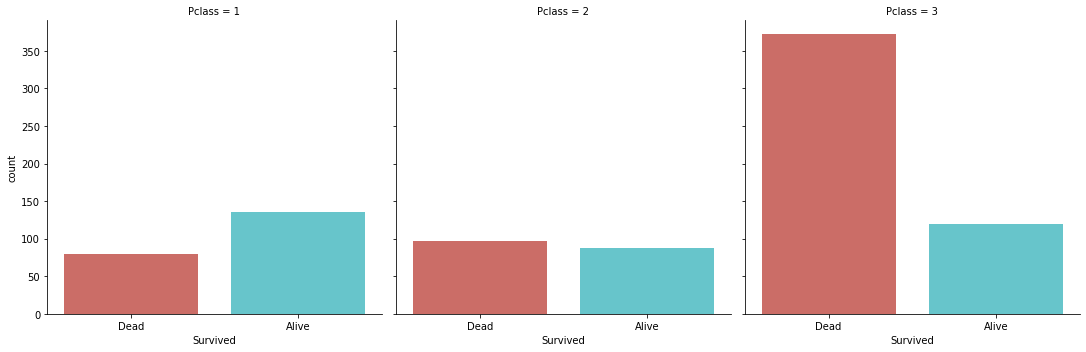

In [13]:
sns.catplot("Survived", col="Sex", data=data, kind="count", palette='hls')
sns.catplot("Survived", col="Pclass", data=data, kind="count", palette='hls')

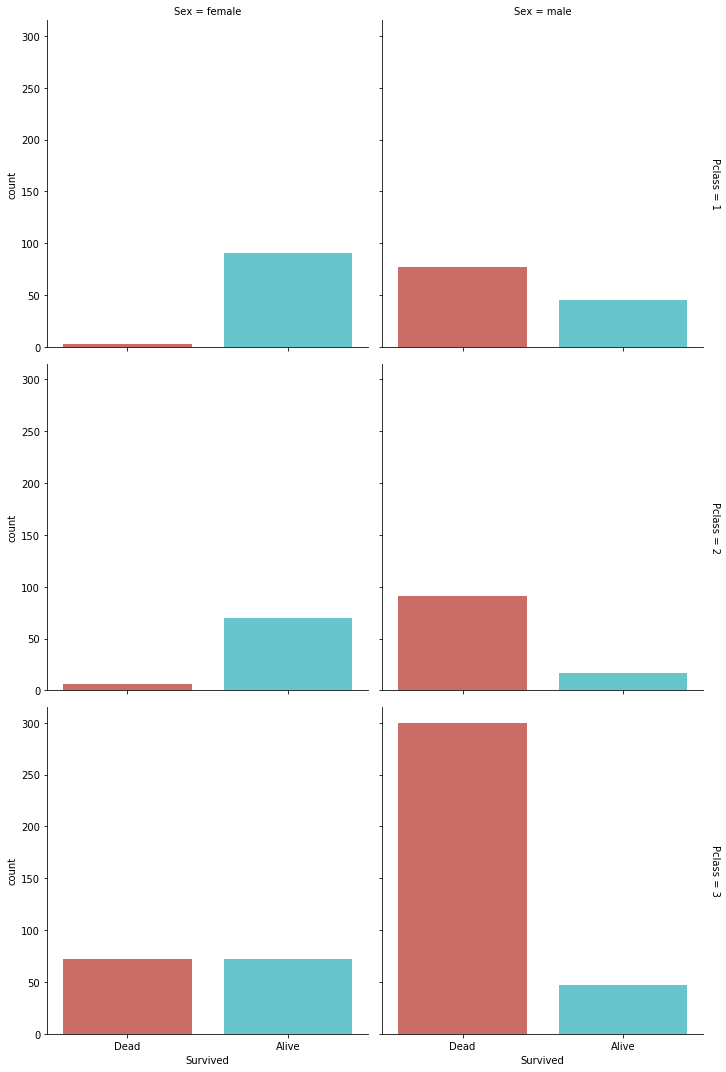

In [14]:
g=sns.catplot("Survived", row="Pclass",col='Sex',data=data, kind='count', palette='hls', margin_titles=True)
#g.map(sns.catplot, "Survived", palette='hls', kind='count')
#plt.show()

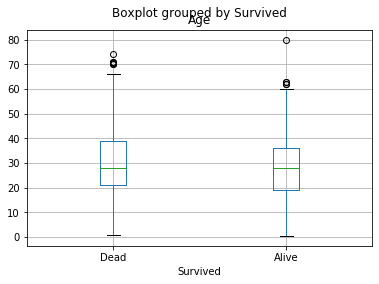

In [15]:
data.boxplot(column='Age',by='Survived', showfliers=True)
plt.show()

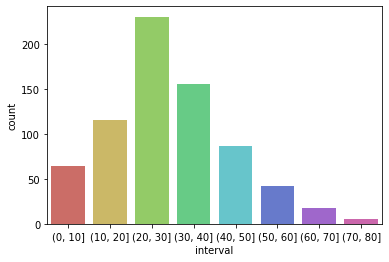

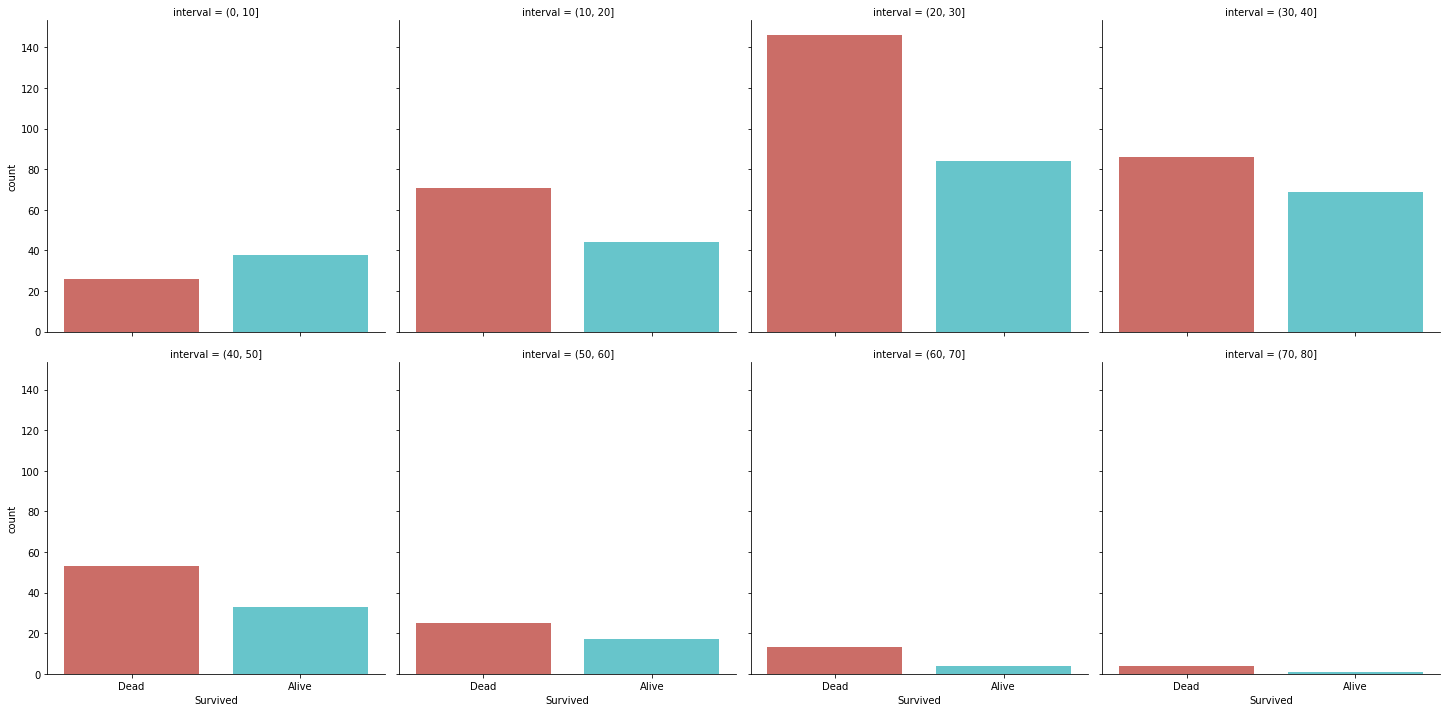

In [25]:
age = data["Age"]
age_corr= data["Age"][data["Age"].notna()]

bins=[0,10,20,30,40,50,60,70,80]
category=pd.cut(age,bins).to_frame()
category.columns=['interval']


sns.countplot(data=category,x='interval', palette = 'hls')
surv=data["Survived"]
df_new = pd.concat([category,surv],axis = 1)
g = sns.catplot("Survived",col='interval',data=df_new, kind="count", col_wrap=4, height=5,aspect=1, palette='hls')
plt.show()

True     714
False    177
Name: Age, dtype: int64


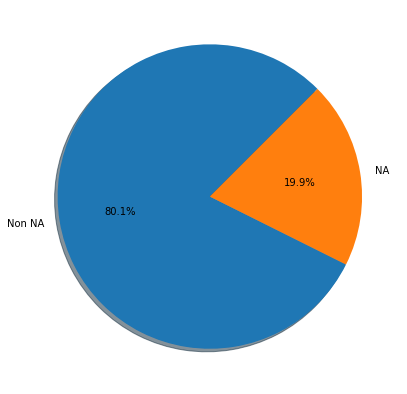

In [26]:
table_na=data["Age"].notna().value_counts()
print(table_na)
plt.figure(figsize=(7,7))
plt.pie(table_na, labels=["Non NA", "NA"], autopct='%1.1f%%',
        shadow=True, startangle=45)
plt.show()

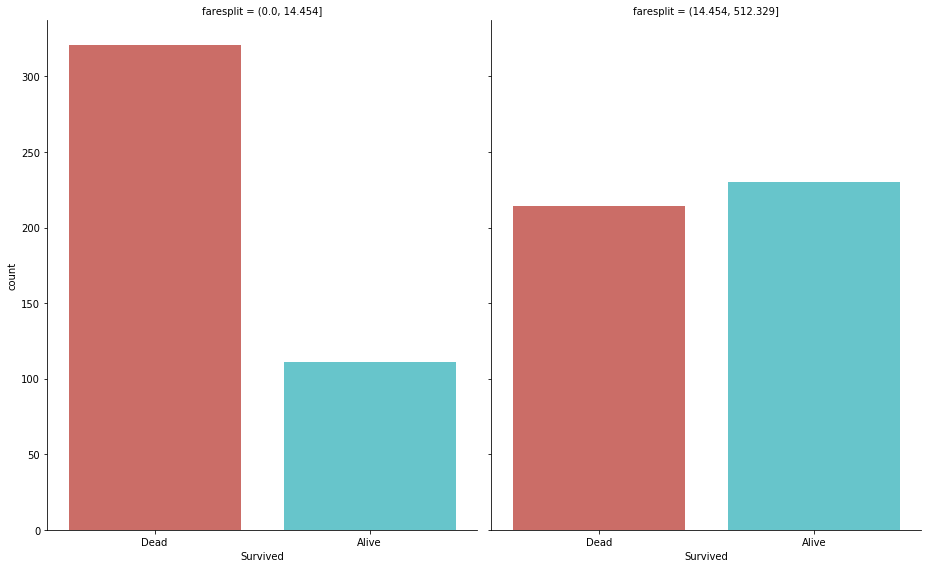

In [27]:
fare=data["Fare"]
med=fare.median()
mini=fare.min()
maxi=fare.max()
bins=[mini,med,maxi]
fare_split=pd.cut(fare,bins).to_frame()
fare_split.columns=['faresplit']
df1=pd.concat([fare_split,surv],axis=1)

p=sns.catplot(x="Survived",col='faresplit', data=df1, kind="count", palette='hls', height=8, aspect=0.8)

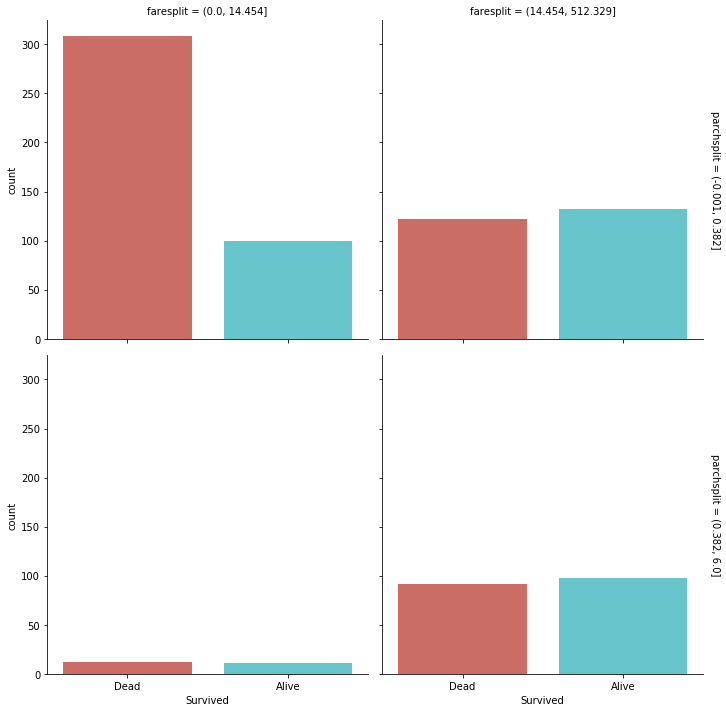

In [28]:
#on repart de la dataFrame df :
parch=data["Parch"]
mini=parch.min()
med= parch.mean()
maxi = parch.max()
bins=[mini,med,maxi]
parch_split=pd.cut(parch,bins, include_lowest=True).to_frame()
parch_split.columns=['parchsplit']
df2=pd.concat([df1,parch_split],axis=1)

p2=sns.catplot("Survived", col="faresplit",row="parchsplit", 
               data=df2, kind='count',margin_titles=True, palette='hls')

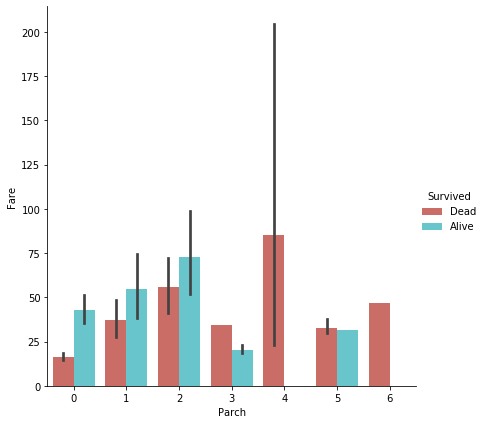

In [29]:
t=sns.catplot(x="Parch",y= "Fare", hue='Survived',data=data, height=6, kind="bar", palette="hls")
plt.show()
#t.despine(left=True)

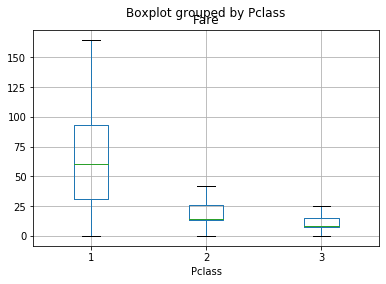

In [30]:
data.boxplot(column="Fare",by='Pclass', showfliers=False)
plt.show()

Pclass      1   2    3
Survived              
Dead       80  97  372
Alive     136  87  119


/Users/paulbrunet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


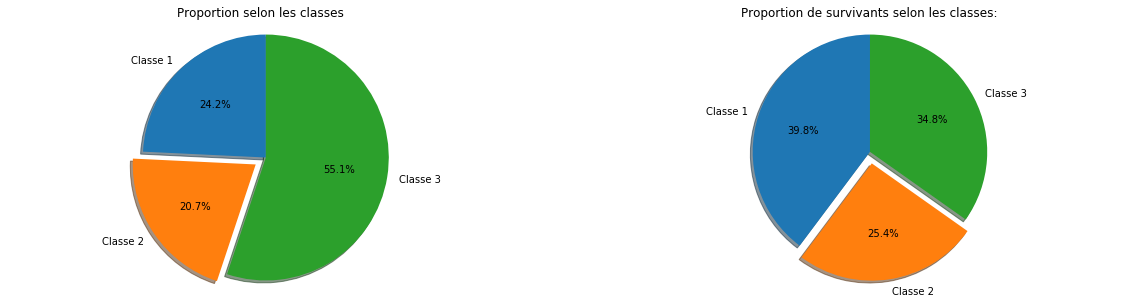

In [31]:
table_class_surv=pd.crosstab(data["Survived"],data["Pclass"])
print(table_class_surv)

fig,ax = plt.subplots(1,2, figsize=(20,5))


ax[0].pie(table_Pclass,explode=(0,0.1,0), labels=["Classe 1", "Classe 2", "Classe 3"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title("Proportion selon les classes")

ax[1].pie(table_class_surv[1:].T,explode=(0,0.1,0), labels=["Classe 1", "Classe 2", "Classe 3"], autopct='%1.1f%%',
          shadow=True, startangle=90)

ax[1].axis('equal')
ax[1].set_title("Proportion de survivants selon les classes:")

plt.show()

# Partie 2 : Premiers Modèles sans la variable Age

In [32]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

In [33]:
# Table de départ
data.head()
#removing Age
data2=data.drop(['Age'], axis=1)

#replacing Sex by a binary variable
data2['Sex']=data2['Sex'].replace("male",1)
data2['Sex']=data2['Sex'].replace("female",0)
data2['Survived']=data2['Survived'].replace("Dead",0)
data2['Survived']=data2['Survived'].replace("Alive",1)
data2['Sex']=pd.Categorical(data2['Sex'])

# Création d'indicatrice pour Pclass
df1=pd.get_dummies(data2[["Pclass"]])
df1=df1.drop(['Pclass_1'],axis=1)  #rendre le modèle régulier

# Extraction des autres variables
df2=data2[["Fare","SibSp","Parch","Sex","Survived"]]

# Concaténation
dataf2_c=pd.concat([df1,df2],axis=1)

# Vérification
print(dataf2_c)

     Pclass_2  Pclass_3     Fare  SibSp  Parch Sex  Survived
0           0         1   7.2500      1      0   1         0
1           0         0  71.2833      1      0   0         1
2           0         1   7.9250      0      0   0         1
3           0         0  53.1000      1      0   0         1
4           0         1   8.0500      0      0   1         0
..        ...       ...      ...    ...    ...  ..       ...
886         1         0  13.0000      0      0   1         0
887         0         0  30.0000      0      0   0         1
888         0         1  23.4500      1      2   0         0
889         0         0  30.0000      0      0   1         1
890         0         1   7.7500      0      0   1         0

[891 rows x 7 columns]


In [34]:
#X => variables , Y => veccteur de réponses
X_data2=dataf2_c.drop(['Survived'], axis=1)
y_data2 = pd.to_numeric(dataf2_c["Survived"])

#création des sets apprentissages et test (varibles + reponses)
T_train,T_test,z_train,z_test = train_test_split(X_data2,y_data2, test_size=0.2, random_state=45)

In [35]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(solver="newton-cg") 
titan_logit=logit.fit(T_train, z_train) 
titan_logit.score(T_test, z_test)

0.8379888268156425

In [36]:
pd.DataFrame(np.concatenate([titan_logit.intercept_.reshape(-1,1),
                             titan_logit.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(T_train.columns)).T

,coef
constante,1.946736
Pclass_2,-0.543946
Pclass_3,-1.322192
Fare,0.006062
SibSp,-0.255930
Parch,-0.155593
Sex,-2.561282


In [37]:
# grille de valeurs
from sklearn.model_selection import GridSearchCV
param=[{"C":[0.1,0.2,0.4,0.5,0.7,0.8,0.9]}]
logit = GridSearchCV(LogisticRegression(penalty="l2"), param, n_jobs=-1)
titan_logit=logit.fit(T_train, z_train) 
# paramètre optimal
titan_logit.best_params_["C"]

/Users/paulbrunet/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/paulbrunet/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.1

In [38]:
logit = LogisticRegression(C=0.1,penalty="l2") 
titan_logit=logit.fit(T_train, z_train)


titan_logit.score(T_test, z_test)

/Users/paulbrunet/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8491620111731844

## Tree:

In [39]:
from sklearn.tree import DecisionTreeClassifier 
tree=DecisionTreeClassifier() 
digit_tree=tree.fit(T_train, z_train)
# Score prevision tree
digit_tree.score(T_test,z_test)

0.8491620111731844

In [40]:
from sklearn.model_selection import GridSearchCV 
param=[{"max_depth":list(range(2,10))}]
titan_tree= GridSearchCV(DecisionTreeClassifier(), param,cv=5,n_jobs=-1)
titan_opt=titan_tree.fit(T_train, z_train)
# paramètre optimal
titan_opt.best_params_

{'max_depth': 4}

In [41]:
#on abaisse la profondeur max pcq 4 c'est trop
tree=DecisionTreeClassifier(max_depth=3) 
titan_tree=tree.fit(T_train, z_train)
# Score apprentissage
titan_tree.score(T_train,z_train)

0.800561797752809

In [42]:
# Score prevision test:
titan_tree.score(T_test,z_test)

0.8491620111731844

In [43]:
# prévision de l’échantillon test
z_chap = titan_tree.predict(T_test)
# table de contingence
table=pd.crosstab(z_test,z_chap, rownames=["Survived"],colnames=["Prediction"])
table

Prediction,0,1
Survived,,
0,104,13
1,14,48


In [44]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(titan_tree, out_file=dot_data,feature_names= ["Pclass_2","Pclass_3","Fare","SibSp","Parch","Sexe"]) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("titan_tree.png")

/Users/paulbrunet/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


True

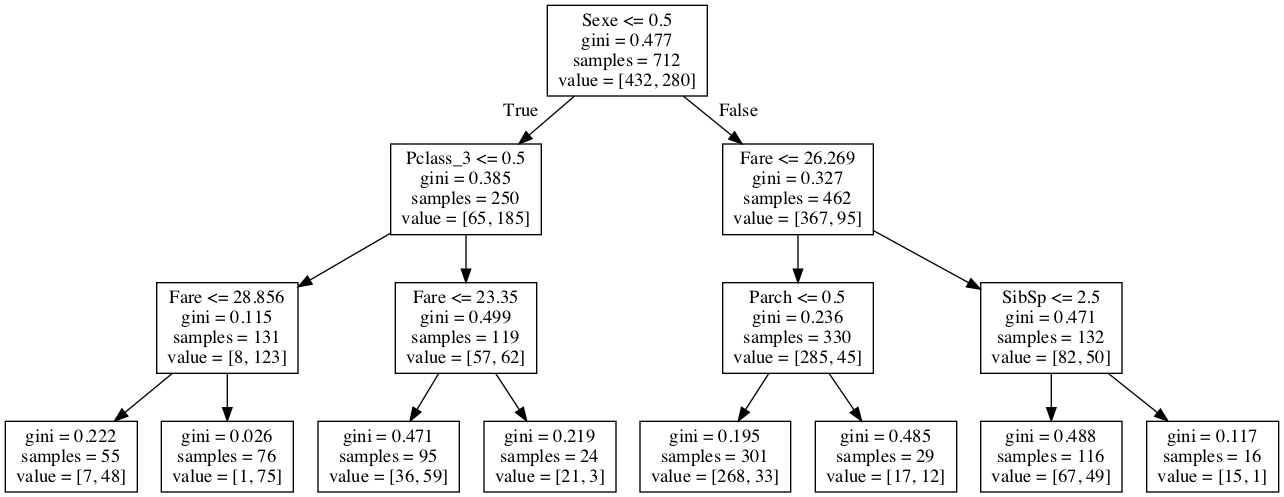

In [45]:
from IPython.core.display import Image 
Image(filename='titan_tree.png')

## Forest :

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, 
                                min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=True)
# apprentissage
forest = forest.fit(T_train,z_train) 
print("OOB Score",forest.oob_score_)
# erreur de prévision sur le test 
forest.score(T_test,z_test)

OOB Score 0.7851123595505618


0.8324022346368715

## Courbes ROC:

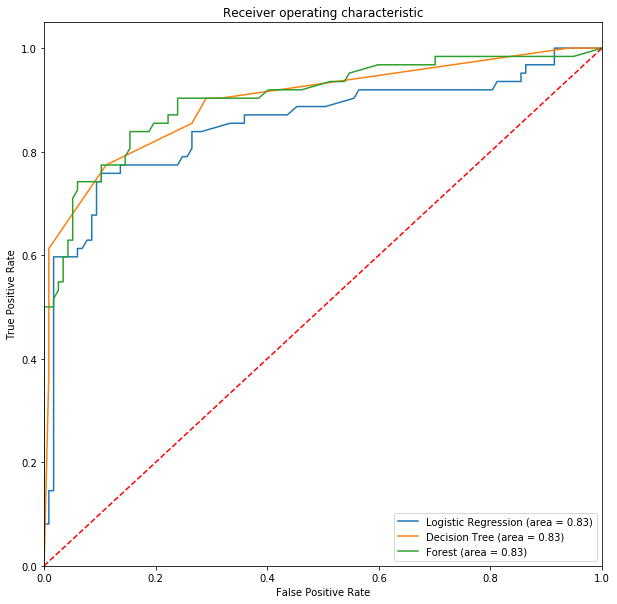

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_model = roc_auc_score(z_test, titan_logit.predict(T_test))
fpr_model, tpr_model, thresholds_model = roc_curve(z_test, titan_logit.predict_proba(T_test)[:,1])

roc_tree = roc_auc_score(z_test, titan_tree.predict(T_test))
fpr_tree, tpr_tree, thresholds_tree = roc_curve(z_test, titan_tree.predict_proba(T_test)[:,1])

roc_forest = roc_auc_score(z_test, titan_logit.predict(T_test))
fpr_forest, tpr_forest, thresholds_forest = roc_curve(z_test, forest.predict_proba(T_test)[:,1])

fig=plt.figure(figsize=(10,10))
plt.plot(fpr_model, tpr_model, label='Logistic Regression (area = %0.2f)' % roc_model)
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (area = %0.2f)' % roc_tree)
plt.plot(fpr_forest, tpr_forest, label='Forest (area = %0.2f)' % roc_forest)



plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Partie 3 : Modèles avec la variable Age

In [48]:
# Table de départ
data.head()
data3=data2.copy()


#replacing Age by a binary variable
data3["Age"]=data["Age"]

# Création d'indicatrice pour Pclass
df1=pd.get_dummies(data3[["Pclass"]])
df1=df1.drop(['Pclass_1'],axis=1)  #rendre le modèle régulier

# Extraction des autres variables
df2=data3[["Fare","SibSp","Parch","Sex","Age","Survived"]]

# Concaténation
data3f_c=pd.concat([df1,df2],axis=1)
data3f_c['Survived']=data2['Survived']
data3f_c

,Pclass_2,Pclass_3,Fare,SibSp,Parch,Sex,Age,Survived
0,0,1,7.2500,1,0,1,22.0,0
1,0,0,71.2833,1,0,0,38.0,1
2,0,1,7.9250,0,0,0,26.0,1
3,0,0,53.1000,1,0,0,35.0,1
4,0,1,8.0500,0,0,1,35.0,0
...,...,...,...,...,...,...,...,...
886,1,0,13.0000,0,0,1,27.0,0
887,0,0,30.0000,0,0,0,19.0,1
888,0,1,23.4500,1,2,0,NaN,0
889,0,0,30.0000,0,0,1,26.0,1


In [49]:
data3f_c[data3f_c['Age'].isnull()]

,Pclass_2,Pclass_3,Fare,SibSp,Parch,Sex,Age,Survived
5,0,1,8.4583,0,0,1,NaN,0
17,1,0,13.0000,0,0,1,NaN,1
19,0,1,7.2250,0,0,0,NaN,1
26,0,1,7.2250,0,0,1,NaN,0
28,0,1,7.8792,0,0,0,NaN,1
...,...,...,...,...,...,...,...,...
859,0,1,7.2292,0,0,1,NaN,0
863,0,1,69.5500,8,2,0,NaN,0
868,0,1,9.5000,0,0,1,NaN,0
878,0,1,7.8958,0,0,1,NaN,0


In [50]:
from sklearn.ensemble import ExtraTreesRegressor as ETRg
from math import *
Etr = ETRg(n_estimators = 200, random_state = 2)

#on prend tout sauf les Na
AgeXTrain = data3f_c[data3f_c['Age'].notnull()]

#on drop la varibale Age pour garder les variables explicatives
AgeXTrain=AgeXTrain.drop(['Age'],axis=1)

#vecteur réponse de Age du set Train
AgeYTrain = data3f_c['Age'][data3f_c['Age'].notnull()]

#on prend toutes les variables explicatives des NA
AgeXTest = data3f_c[data3f_c['Age'].isnull()] 
AgeXTest=AgeXTest.drop(['Age'],axis=1)

#on eduque le modèle
Etr.fit(AgeXTrain,np.ravel(AgeYTrain)) 

#on prédit les Na
AgePred = Etr.predict(AgeXTest)

#on remplace les Na par nos predictions
data3f_c.loc[data3f_c['Age'].isnull(), 'Age'] = AgePred
data3f_c.describe(include='all')

,Pclass_2,Pclass_3,Fare,SibSp,Parch,Sex,Age,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000
unique,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,577.0,NaN,NaN
mean,0.206510,0.551066,32.204208,0.523008,0.381594,NaN,29.536268,0.383838
std,0.405028,0.497665,49.693429,1.102743,0.806057,NaN,13.888463,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.420000,0.000000
25%,0.000000,0.000000,7.910400,0.000000,0.000000,NaN,21.000000,0.000000
50%,0.000000,1.000000,14.454200,0.000000,0.000000,NaN,28.000000,0.000000
75%,0.000000,1.000000,31.000000,1.000000,0.000000,NaN,37.000000,1.000000


In [51]:
#verification de la complétion
data3f_c[data3f_c.isnull().T.any().T]

,Pclass_2,Pclass_3,Fare,SibSp,Parch,Sex,Age,Survived


## Création du modèle:

In [52]:
#X => variables , Y => veccteur de réponses
X_data3=data3f_c.drop(['Survived'], axis=1)
y_data3 = pd.to_numeric(data3f_c["Survived"])

#création des sets apprentissages et test (varibles + reponses)
T_train,T_test,z_train,z_test = train_test_split(X_data3,y_data3, test_size=0.2, random_state=45)

In [53]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(solver="newton-cg") 
titan_logit=logit.fit(T_train, z_train) 
titan_logit.score(T_test, z_test)

0.8435754189944135

In [54]:
pd.DataFrame(np.concatenate([titan_logit.intercept_.reshape(-1,1),
                             titan_logit.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(T_train.columns)).T

,coef
constante,3.694599
Pclass_2,-0.961516
Pclass_3,-1.964177
Fare,0.004890
SibSp,-0.391789
Parch,-0.167140
Sex,-2.519104
Age,-0.041969


In [55]:
# grille de valeurs
from sklearn.model_selection import GridSearchCV
param=[{"C":[0.1,0.2,0.4,0.5,0.7,0.8,0.9]}]
logit = GridSearchCV(LogisticRegression(penalty="l2"), param, n_jobs=-1)
titan_logit=logit.fit(T_train, z_train) 
# paramètre optimal
titan_logit.best_params_["C"]

/Users/paulbrunet/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/paulbrunet/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.2

In [56]:
logit = LogisticRegression(C=0.2,penalty="l2") 
titan_logit=logit.fit(T_train, z_train)


titan_logit.score(T_test, z_test)

/Users/paulbrunet/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8547486033519553

## Arbre:

In [57]:
from sklearn.tree import DecisionTreeClassifier 
tree=DecisionTreeClassifier() 
digit_tree=tree.fit(T_train, z_train)
# Score prevision tree
digit_tree.score(T_test,z_test)

0.8324022346368715

In [58]:
from sklearn.model_selection import GridSearchCV 
param=[{"max_depth":list(range(2,10))}]
titan_tree= GridSearchCV(DecisionTreeClassifier(), param,cv=5,n_jobs=-1)
titan_opt=titan_tree.fit(T_train, z_train)
# paramètre optimal
titan_opt.best_params_

{'max_depth': 3}

In [59]:
tree=DecisionTreeClassifier(max_depth=3) 
titan_tree=tree.fit(T_train, z_train)
# Score apprentissage
titan_tree.score(T_train,z_train)

0.8202247191011236

In [60]:
# Score prevision test:
titan_tree.score(T_test,z_test)

0.8491620111731844

In [61]:
# prévision de l’échantillon test
z_chap = titan_tree.predict(T_test)
# table de contingence
table=pd.crosstab(z_test,z_chap, rownames=["Survived"],colnames=["Prediction"])
table

Prediction,0,1
Survived,,
0,104,13
1,14,48


In [62]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(titan_tree, out_file=dot_data,feature_names= ["Pclass_2","Pclass_3","Fare","SibSp","Parch","Sexe","Age"]) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("titan_tree.png")

True

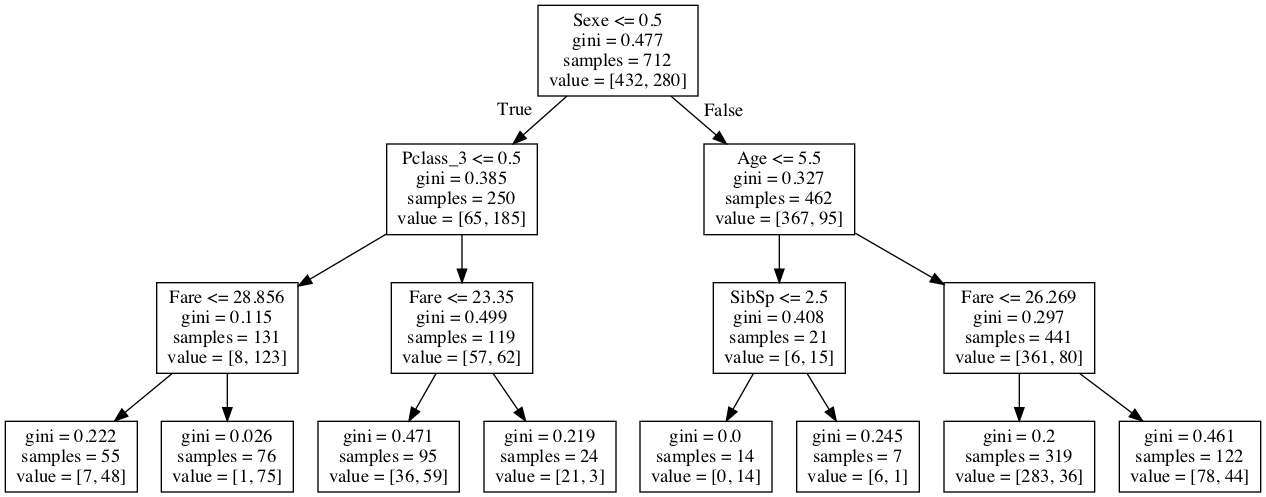

In [63]:
from IPython.core.display import Image 
Image(filename='titan_tree.png')

## Forest:

In [64]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, 
                                min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=True)
# apprentissage
forest = forest.fit(T_train,z_train) 
print("OOB score", forest.oob_score_)
# erreur de prévision sur le test 
forest.score(T_test,z_test)

OOB score 0.8160112359550562


0.8659217877094972

In [65]:
# prévision de l’échantillon test
pred = forest.predict(T_test)
# table de contingence
table=pd.crosstab(z_test,pred, rownames=["Survived"],colnames=["Prediction"])
table

Prediction,0,1
Survived,,
0,103,14
1,10,52


## Courbes ROC:

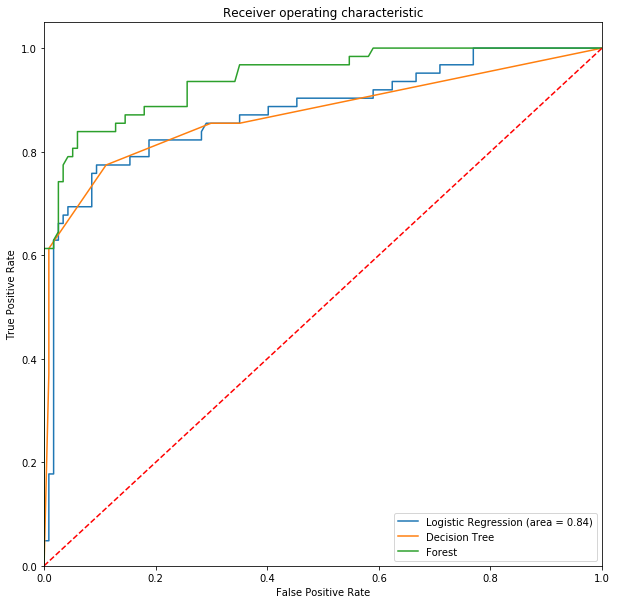

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_model = roc_auc_score(z_test, titan_logit.predict(T_test))
fpr_model, tpr_model, thresholds_model = roc_curve(z_test, titan_logit.predict_proba(T_test)[:,1])

roc_tree = roc_auc_score(z_test, titan_tree.predict(T_test))
fpr_tree, tpr_tree, thresholds_tree = roc_curve(z_test, titan_tree.predict_proba(T_test)[:,1])

roc_forest = roc_auc_score(z_test, titan_logit.predict(T_test))
fpr_forest, tpr_forest, thresholds_forest = roc_curve(z_test, forest.predict_proba(T_test)[:,1])

fig=plt.figure(figsize=(10,10))
plt.plot(fpr_model, tpr_model, label='Logistic Regression (area = %0.2f)' % roc_model)
plt.plot(fpr_tree, tpr_tree, label='Decision Tree' % roc_tree)
plt.plot(fpr_forest, tpr_forest, label='Forest' % roc_forest)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()


#les vecteurs thresholds contiennent les seuils des courbes roc (les palliers)

### Attention data4 est créée à la fin du notebook !!!

In [77]:

def tirage(nb_echantillon,data):
    X_data=data.drop(['Survived'], axis=1)
    y_data = pd.to_numeric(data["Survived"])
    logit1_score=[]
    logit2_score=[]
    tree_score1=[]
    tree_score2=[]
    forest_score=[]

    for i in range(nb_echantillon):
        #création des sets apprentissages et test (varibles + reponses)
        T_train,T_test,z_train,z_test = train_test_split(X_data,y_data, test_size=0.2, random_state=i)

        #Logit Classique
        logit1 = LogisticRegression(solver="newton-cg") 
        titan_logit1=logit1.fit(T_train, z_train) 
        a=titan_logit1.score(T_test, z_test)
        logit1_score.append(a)

        #Logit avec pénalisation
        logit2 = LogisticRegression(solver="newton-cg",C=0.2,penalty="l2") 
        titan_logit2=logit2.fit(T_train, z_train)
        b=titan_logit2.score(T_test, z_test)
        logit2_score.append(b)

        #Arbre classique
        tree1=DecisionTreeClassifier() 
        digit_tree1=tree1.fit(T_train, z_train)
        # Score prevision tree
        c=digit_tree1.score(T_test,z_test)
        tree_score1.append(c)


        #Abre avec max_depth
        tree2=DecisionTreeClassifier(max_depth=3) 
        titan_tree2=tree2.fit(T_train, z_train)
        # Score prevision test:
        d=titan_tree2.score(T_test,z_test)
        tree_score2.append(d)


        #Random Forest :
        forest = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None,min_samples_split=2, 
                                        min_samples_leaf=1, max_features='auto', max_leaf_nodes=None,
                                        bootstrap=True, oob_score=True)

        forest = forest.fit(T_train,z_train) 
        e=forest.score(T_test,z_test)
        forest_score.append(e)
    
    return logit1_score,logit2_score,tree_score1,tree_score2,forest_score

In [115]:
def concatenation(log1,log2,tree1,tree2,forest):
    result_data= pd.DataFrame(log1,columns=['logit1'])
    result_data['logit2'] = pd.DataFrame(log2)
    result_data['tree1']= pd.DataFrame(tree1)
    result_data['tree2']= pd.DataFrame(tree2)
    result_data['forest']= pd.DataFrame(forest)
    return result_data

In [117]:
logit1_score,logit2_score,tree_score1,tree_score2,forest_score=tirage(25,data4)
result_data4=concatenation(logit1_score,logit2_score,tree_score1,tree_score2,forest_score)

In [116]:
logit1_score,logit2_score,tree_score1,tree_score2,forest_score=tirage(25,data3f_c)
result_data3=concatenation(logit1_score,logit2_score,tree_score1,tree_score2,forest_score)

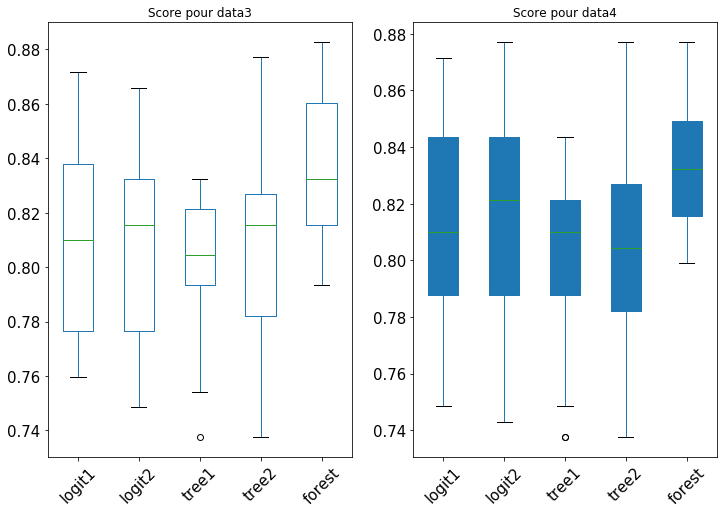

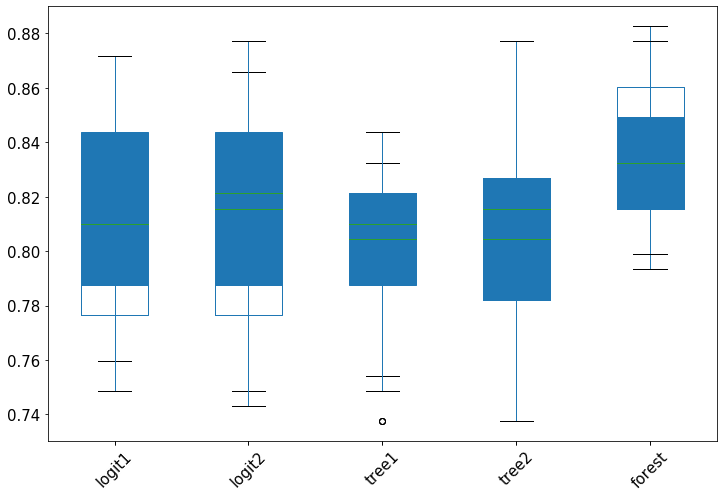

In [156]:
figure=plt.figure(figsize=(12,8))
axes = figure.add_subplot(1,2,1)
result_data3.boxplot(grid=False, rot=45, fontsize=15)
axes.set_title('Score pour data3')

axes2=plt.subplot(1,2,2)
result_data4.boxplot(grid=False, rot=45, fontsize=15,patch_artist=True)
axes2.set_title('Score pour data4')

#result_data.boxplot(['logit1','logit2','tree1','tree2','forest'])
plt.show()

plt.figure(figsize=(12,8))
result_data3.boxplot(grid=False, rot=45, fontsize=15,patch_artist=False)
result_data4.boxplot(grid=False, rot=45, fontsize=15,patch_artist=True)
plt.show()

# Partie 4 : ACP

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# définition de la commande
pca = PCA()
# Sélection des variables quantitatives
dat=data3f_c[["Age","SibSp","Parch", "Fare"]]
# réduction
datt = pd.DataFrame(scale(dat),columns=dat.columns)
# Estimation, calcul des composantes principales
C = pca.fit(datt).transform(datt)

dat

In [ ]:
# Eboulis des valeurs propres
# Décroissance de la variance expliquée
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
# Diagrammes boîte des composantes principales
plt.figure()
plt.boxplot(C[:,0:20])
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
for i, j, nom in zip(C[:,0], C[:,1], data3f_c['Survived']):
    color = "red" if nom ==0 else "blue"
    plt.text(i, j, nom, color=color)
plt.axis((-4,8,-3,9))  
plt.show()

In [ ]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, dat.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

### Analyse de la variable Nom

In [102]:
import re

In [103]:
def cleaning(list_string):
    list_cleaned=[]
    for k in list_string:
        mot= k.lower()
        mot=mot.replace(u'\u00B7','')
        mot = re.sub('[^a-z_]', '', mot)
        list_cleaned+=[mot]
    return list_cleaned

In [104]:
def titre(list_nom,list_titre):
    titres_people=[]
    for k in list_nom:
        nom=k.split(" ")
        nom_cleaned=cleaning(nom)
        titre = [w for w in nom_cleaned if (w in list_titre)]
        if titre==[]:
            titres_people+=[0]
        else:
            titres_people+=[1]
    return titres_people

            

In [105]:
list_titre=["am","don","dr","rev","col","lady","am","countess","capt","cap","sir","jonkheer","major","master"]

In [106]:
data_titre=titre(data_all["Name"],list_titre)
data_titre=pd.DataFrame(data_titre,columns =['Titre'])

In [107]:
data_titre

,Titre
0,0
1,0
2,0
3,0
4,0
...,...
886,1
887,0
888,0
889,0


In [108]:
data_titre["Titre"].describe()

count    891.000000
mean       0.070707
std        0.256479
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Titre, dtype: float64

0    828
1     63
Name: Titre, dtype: int64


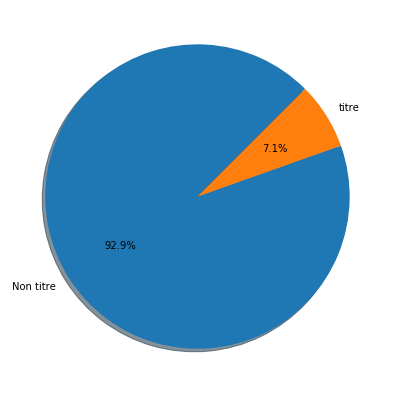

In [109]:
table=data_titre["Titre"].value_counts()
print(table)
plt.figure(figsize=(7,7))
plt.pie(table, labels=["Non titre", "titre"], autopct='%1.1f%%',
        shadow=True, startangle=45)
plt.show()

In [110]:
data4= pd.concat([data3f_c,data_titre],axis=1)

#X => variables , Y => veccteur de réponses
X_data4=data4.drop(['Survived'], axis=1)
y_data4 = pd.to_numeric(data4["Survived"])

#création des sets apprentissages et test (varibles + reponses)
T_train,T_test,z_train,z_test = train_test_split(X_data4,y_data4, test_size=0.2, random_state=45)

In [111]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, 
                                min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=True)
# apprentissage
forest = forest.fit(T_train,z_train) 
print("OOB score", forest.oob_score_)
# erreur de prévision sur le test 
forest.score(T_test,z_test)

OOB score 0.8174157303370787


0.8715083798882681

In [112]:
# prévision de l’échantillon test
pred = forest.predict(T_test)
# table de contingence
table=pd.crosstab(z_test,pred, rownames=["Survived"],colnames=["Prediction"])
table

Prediction,0,1
Survived,,
0,102,15
1,8,54


### Comments:

La variable Title permet de baisser la variabilité des scores.